In [2]:

import sys
sys.path.append("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123/tool/nuscenes-devkit/python-sdk")
sys.path.append("/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123")
import os
os.environ["D123_DEVKIT_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/d123"
os.environ["D123_DATA_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data"
os.environ["D123_MAPS_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/data/maps"
os.environ["D123_EXP_ROOT"] = "/inspire/hdd/project/roboticsystem2/jingzhanghui-253108140204/d123_workspace/exp"
os.environ["NUPLAN_DATA_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuplan/dataset"
os.environ["NUPLAN_MAPS_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuplan/dataset/maps"
os.environ["NUSCENES_DATA_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuscenes"
os.environ["NUSCENES_MAPS_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuscenes"
os.environ["CARLA_DATA_ROOT"] = "/nas/shared/opendrivelab/nuplan/dataset"


In [3]:
import matplotlib.pyplot as plt
import shapely
import numpy as np
from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion.arcline_path_utils import discretize_lane

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [20]:
NUSCENES_MAPS = {
    "boston-seaport": "boston-seaport",
    "singapore-hollandvillage": "singapore-hollandvillage",
    "singapore-onenorth": "singapore-onenorth",
    "singapore-queenstown": "singapore-queenstown"
}
NUSCENES_MAPS_ROOT = os.environ["NUSCENES_MAPS_ROOT"]

In [21]:
nusc_maps= {}
for map_name, map_key in NUSCENES_MAPS.items():
    nusc_maps[map_name] = NuScenesMap(dataroot=NUSCENES_MAPS_ROOT, map_name=map_key)

In [22]:
map_api = nusc_maps['boston-seaport']
test_lane_token = "cd675065-fbca-4e96-bdd8-894d8d7af508"
# test_lane_token = map_api.lane[1]['token']
print(test_lane_token) 
next_lanes = map_api.get_outgoing_lane_ids(test_lane_token)


centerline = map_api.get('lane', test_lane_token)
centerline_arc_path = map_api.arcline_path_3[test_lane_token]
centerline_ls = shapely.geometry.LineString(discretize_lane(centerline_arc_path, 0.1))


# print(dir(map_api))
# print(centerline)
# print(next_lanes)

cd675065-fbca-4e96-bdd8-894d8d7af508


In [23]:
from_centerline = map_api.extract_line(centerline['from_edge_line_token'])
to_centerline = map_api.extract_line(centerline['to_edge_line_token'])
exterior_polygon = map_api.extract_polygon(centerline['polygon_token'])

In [24]:
land_connector=map_api.get_outgoing_lane_ids(test_lane_token)
print(land_connector)

[]


In [25]:
# centerline1 = map_api.get('lane_connector', connector_tokens[2])
# centerline1_arc_path = map_api.arcline_path_3[connector_tokens[2]]
# centerline1_ls = shapely.geometry.LineString(discretize_lane(centerline1_arc_path, 0.1))

# centerline2 = map_api.get('lane_connector', connector_tokens[3])
# centerline2_arc_path = map_api.arcline_path_3[connector_tokens[3]]
# centerline2_ls = shapely.geometry.LineString(discretize_lane(centerline2_arc_path, 0.1))

# centerline3 = map_api.get('lane_connector', connector_tokens[0])
# centerline3_arc_path = map_api.arcline_path_3[connector_tokens[0]]
# centerline3_ls = shapely.geometry.LineString(discretize_lane(centerline3_arc_path, 0.1))

In [26]:
left_lane_divider = shapely.geometry.LineString(
    np.array([(node['x'], node['y']) for node in centerline['left_lane_divider_segment_nodes']])) if len(centerline['left_lane_divider_segment_nodes']) > 0 else None
right_lane_divider = shapely.geometry.LineString(
    np.array([(node['x'], node['y']) for node in centerline['right_lane_divider_segment_nodes']])) if len(centerline['right_lane_divider_segment_nodes']) > 0 else None

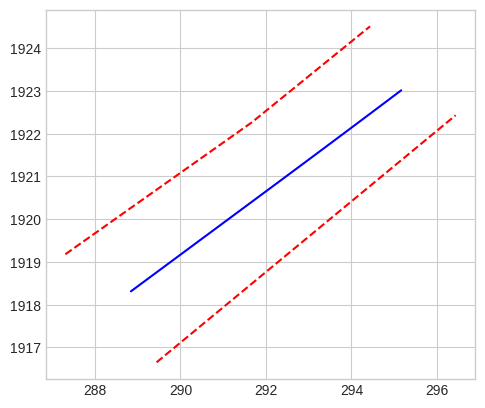

In [30]:
plt.plot(*centerline_ls.xy, 'b-')
# plt.plot(*centerline1_ls.xy, 'r-')
# plt.plot(*centerline2_ls.xy, 'r-')
# plt.plot(*centerline3_ls.xy, 'r-')

# plt.plot(*from_centerline.xy, 'g-')
# plt.plot(*to_centerline.xy, 'r-')
plt.plot(*left_lane_divider.xy, 'r--')
plt.plot(*right_lane_divider.xy, 'r--')

# plt.plot(*exterior_polygon.exterior.xy, 'g--')
# for c in map_api.lane_connector:
#     if c['token'] in connector_tokens:
#         con_poly = map_api.extract_polygon(c['polygon_token'])

#         # 如果是 MultiPolygon，转成 list 处理
#         polys = list(con_poly.geoms) if con_poly.geom_type == 'MultiPolygon' else [con_poly]

#         # 只画第 1 个和第 3 个
#         for i, poly in enumerate(polys):
#             if i in (0, 2):  # 画第一个和第三个
#                 plt.plot(*poly.exterior.xy, 'k--', label='connector polygon')


# c =map_api.lane_connector[1]
# con_poly = map_api.extract_polygon(map_api.lane_connector[1]['polygon_token'])
# plt.plot(*con_poly.exterior.xy, 'k--', label='connector polygon')

plt.gca().set_aspect("equal")
plt.show()
# plt.legend()


In [28]:
# NOTE: this is not correct. Sometimes a lane has multiple line types
left_line_type = centerline['left_lane_divider_segments'][0]['segment_type'] if len(centerline['left_lane_divider_segments']) > 0 else None
right_line_type = centerline['right_lane_divider_segments'][0]['segment_type'] if len(centerline['right_lane_divider_segments']) > 0 else None

In [29]:
print(left_line_type)

DOUBLE_DASHED_WHITE


In [5]:
import os
from nuscenes.map_expansion.map_api import NuScenesMap
from pathlib import Path

def inspect_nuscenes_structure():
    """检查 NuScenes 地图数据结构"""
    
    # 设置环境变量
    os.environ["NUSCENES_MAPS_ROOT"] = "/inspire/hdd/project/roboticsystem2/public/nuscenes"
    
    # 可用的地图名称
    map_names = [
        "boston-seaport", 
        "singapore-hollandvillage", 
        "singapore-onenorth", 
        "singapore-queenstown"
    ]
    
    for map_name in map_names:
        print(f"\n{'='*60}")
        print(f"检查地图: {map_name}")
        print(f"{'='*60}")
        
        try:
            # 加载地图
            nusc_map = NuScenesMap(dataroot=os.environ["NUSCENES_MAPS_ROOT"], map_name=map_name)
            
            # 检查主要表的结构
            tables = [
                'lane', 'road_segment', 'road_block', 'ped_crossing', 
                'walkway', 'carpark_area', 'drivable_area', 
                'road_divider', 'lane_divider', 'stop_line', 'lane_connector'
            ]
            
            for table in tables:
                print(f"\n--- {table} ---")
                records = getattr(nusc_map, table, [])
                
                if not records:
                    print(f"  无记录")
                    continue
                
                # 显示记录数量
                if isinstance(records, list):
                    print(f"  记录数量: {len(records)}")
                    if records:
                        sample_record = records[0]
                elif isinstance(records, dict):
                    print(f"  记录数量: {len(records)}")
                    sample_record = list(records.values())[0] if records else {}
                else:
                    print(f"  未知类型: {type(records)}")
                    continue
                
                # 显示字段信息
                if sample_record:
                    print(f"  字段: {list(sample_record.keys())}")
                    
                    # 特别关注边界相关字段
                    boundary_fields = [key for key in sample_record.keys() if any(term in key.lower() for term in ['divider', 'boundary', 'segment', 'node'])]
                    if boundary_fields:
                        print(f"  边界相关字段: {boundary_fields}")
                        
                        # 显示边界字段的详细内容
                        for field in boundary_fields:
                            if field in sample_record:
                                field_data = sample_record[field]
                                if isinstance(field_data, list):
                                    print(f"    {field}: 列表长度 {len(field_data)}")
                                    if field_data and len(field_data) > 0:
                                        first_item = field_data[0]
                                        if isinstance(first_item, dict):
                                            print(f"      第一个元素字段: {list(first_item.keys())}")
                                        else:
                                            print(f"      第一个元素类型: {type(first_item)}")
                                else:
                                    print(f"    {field}: 类型 {type(field_data)}")
            
            # 特别检查车道记录的详细结构
            print(f"\n--- 详细检查车道记录 ---")
            if nusc_map.lane and len(nusc_map.lane) > 0:
                lane_sample = nusc_map.lane[0]
                print(f"车道token: {lane_sample.get('token', 'N/A')}")
                
                # 检查所有可能的边界字段
                possible_boundary_fields = [
                    'left_lane_divider_segment_nodes', 'right_lane_divider_segment_nodes',
                    'left_lane_divider_segments', 'right_lane_divider_segments',
                    'left_boundary', 'right_boundary',
                    'left_lane_divider', 'right_lane_divider'
                ]
                
                for field in possible_boundary_fields:
                    if field in lane_sample:
                        field_data = lane_sample[field]
                        print(f"  {field}:")
                        if isinstance(field_data, list):
                            print(f"    类型: 列表, 长度: {len(field_data)}")
                            if field_data and len(field_data) > 0:
                                first_item = field_data[0]
                                if isinstance(first_item, dict):
                                    print(f"    第一个元素字段: {list(first_item.keys())}")
                                    # 如果是节点，显示坐标信息
                                    if 'x' in first_item and 'y' in first_item:
                                        print(f"    第一个节点坐标: ({first_item['x']:.2f}, {first_item['y']:.2f})")
                                else:
                                    print(f"    第一个元素类型: {type(first_item)}")
                        else:
                            print(f"    类型: {type(field_data)}, 值: {field_data}")
                    else:
                        print(f"  {field}: 不存在")
            
            # 检查arcline路径
            print(f"\n--- Arcline路径检查 ---")
            arcline_keys = ['arcline_path_3', 'arcline_path_5', 'arcline_path_7', 'arcline_path_9']
            for key in arcline_keys:
                if hasattr(nusc_map, key):
                    arcline_data = getattr(nusc_map, key)
                    if isinstance(arcline_data, dict):
                        print(f"  {key}: {len(arcline_data)} 条路径")
                        if arcline_data:
                            sample_path = list(arcline_data.values())[0]
                            print(f"    示例路径点数: {len(sample_path)}")
                            if sample_path and len(sample_path) > 0:
                                print(f"    第一个点: {sample_path[0]}")
            
        except Exception as e:
            print(f"加载地图 {map_name} 时出错: {e}")
            continue

def test_boundary_extraction():
    """测试边界提取"""
    print(f"\n{'='*60}")
    print(f"测试边界提取")
    print(f"{'='*60}")
    
    map_name = "boston-seaport"
    try:
        nusc_map = NuScenesMap(dataroot=os.environ["NUSCENES_MAPS_ROOT"], map_name=map_name)
        
        if nusc_map.lane and len(nusc_map.lane) > 0:
            # 测试前5个车道
            for i, lane_record in enumerate(nusc_map.lane[:5]):
                print(f"\n车道 {i+1}: {lane_record.get('token', 'N/A')}")
                
                # 测试左边界提取
                left_nodes = lane_record.get('left_lane_divider_segment_nodes', [])
                right_nodes = lane_record.get('right_lane_divider_segment_nodes', [])
                
                print(f"  左边界节点数: {len(left_nodes)}")
                print(f"  右边界节点数: {len(right_nodes)}")
                
                # 如果存在节点，尝试创建LineString
                if left_nodes:
                    try:
                        from shapely.geometry import LineString
                        left_line = LineString([(node['x'], node['y']) for node in left_nodes])
                        print(f"  左边界线长度: {left_line.length:.2f}, 有效: {left_line.is_valid}")
                    except Exception as e:
                        print(f"  左边界创建失败: {e}")
                
                if right_nodes:
                    try:
                        from shapely.geometry import LineString
                        right_line = LineString([(node['x'], node['y']) for node in right_nodes])
                        print(f"  右边界线长度: {right_line.length:.2f}, 有效: {right_line.is_valid}")
                    except Exception as e:
                        print(f"  右边界创建失败: {e}")
                
                if i >= 4:  # 只测试前5个
                    break
                    
    except Exception as e:
        print(f"测试边界提取时出错: {e}")

if __name__ == "__main__":
    inspect_nuscenes_structure()
    test_boundary_extraction()


检查地图: boston-seaport

--- lane ---
  记录数量: 1215
  字段: ['token', 'polygon_token', 'lane_type', 'from_edge_line_token', 'to_edge_line_token', 'left_lane_divider_segments', 'right_lane_divider_segments', 'exterior_node_tokens', 'holes', 'left_lane_divider_segment_nodes', 'right_lane_divider_segment_nodes']
  边界相关字段: ['left_lane_divider_segments', 'right_lane_divider_segments', 'exterior_node_tokens', 'left_lane_divider_segment_nodes', 'right_lane_divider_segment_nodes']
    left_lane_divider_segments: 列表长度 0
    right_lane_divider_segments: 列表长度 0
    exterior_node_tokens: 列表长度 8
      第一个元素类型: <class 'str'>
    left_lane_divider_segment_nodes: 列表长度 0
    right_lane_divider_segment_nodes: 列表长度 0

--- road_segment ---
  记录数量: 928
  字段: ['token', 'polygon_token', 'is_intersection', 'drivable_area_token', 'exterior_node_tokens', 'holes']
  边界相关字段: ['exterior_node_tokens']
    exterior_node_tokens: 列表长度 5
      第一个元素类型: <class 'str'>

--- road_block ---
  记录数量: 969
  字段: ['token', 'polygon_t